# **RESCALING**


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


original image


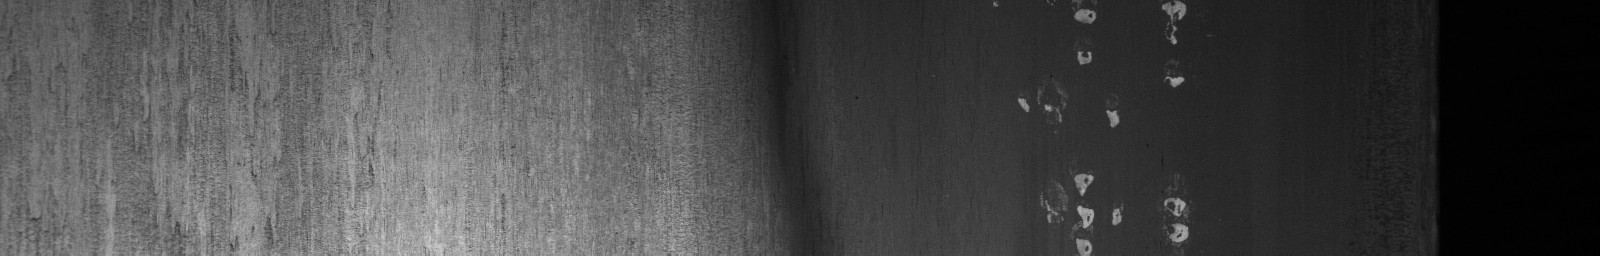

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


image_path = "/content/drive/MyDrive/severstal/train_images/001d1b355.jpg"
image = cv2.imread(image_path)


new_width = 300  # New width in pixels
new_height = 200  # New height in pixels

rescaled_image = cv2.resize(image, (new_width, new_height))
print("original image")
cv2_imshow(image)




Rescaled image


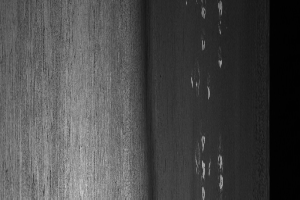

In [ ]:
print("Rescaled image")
cv2_imshow( rescaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Shear an Image**

original image


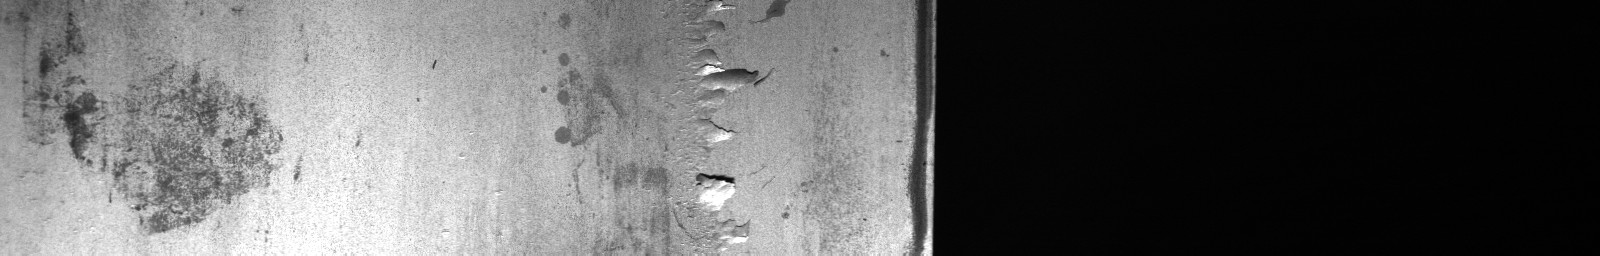

In [ ]:

import numpy as np

def shear_image(image, shear_factor):
    # Get image dimensions
    height, width = image.shape[:2]

    # Define the shear matrix
    shear_matrix = np.array([
        [1, shear_factor, 0],
        [0, 1, 0]
    ], dtype=np.float32)

    # Apply the affine transformation using warpAffine
    sheared_image = cv2.warpAffine(image, shear_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT)

    return sheared_image

# Load the image from file path
image_path = "/content/drive/MyDrive/severstal/train_images/003ac9d2a.jpg"
image = cv2.imread(image_path)

# Define the shear factor (positive or negative)
shear_factor = 0.5  # Adjust as needed

# Shear the image
sheared_image = shear_image(image, shear_factor)

# Display the original and sheared images (optional)
print("original image")
cv2_imshow( image)





sheared image


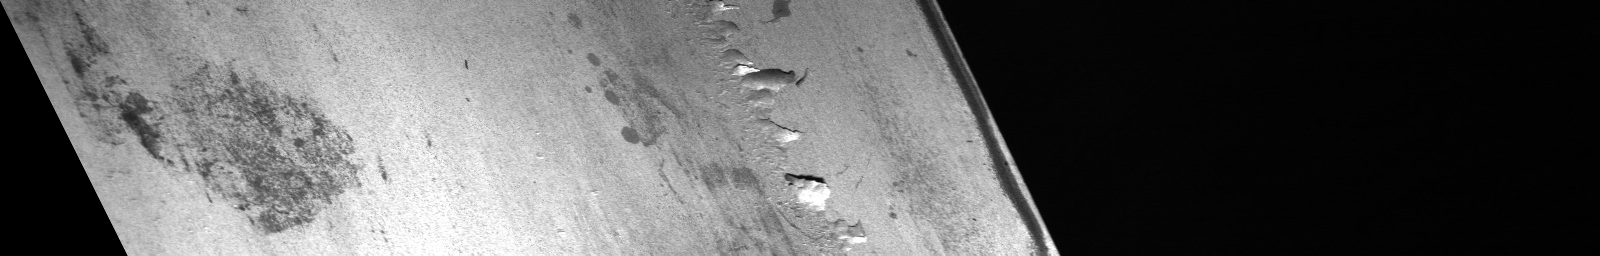

In [ ]:
print("sheared image")
cv2_imshow(sheared_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Zooming**


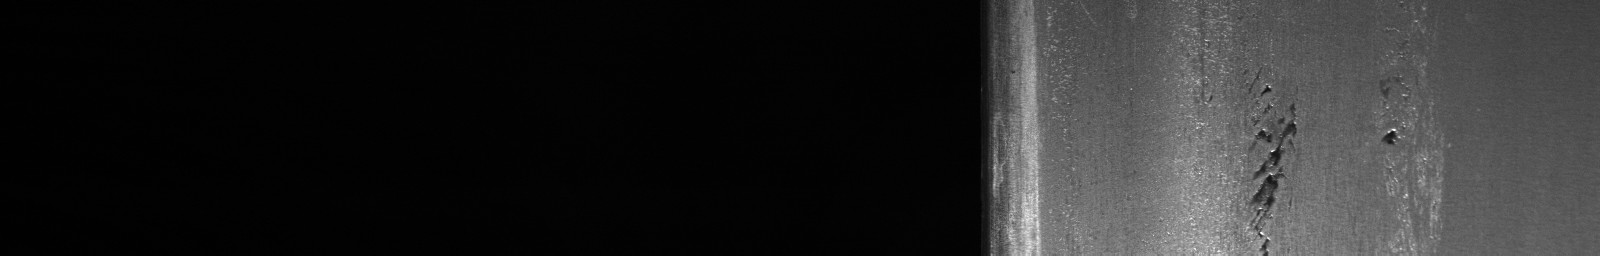

In [ ]:
import cv2

def zoom_in(image, scale_factor):
    # Get image dimensions
    height, width = image.shape[:2]

    # Define the new dimensions after zooming
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    # Resize the image using bilinear interpolation
    zoomed_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    return zoomed_image

image_path = "/content/drive/MyDrive/severstal/train_images/025dc8dc8.jpg"
# Load the image from file pathg"
image = cv2.imread(image_path)

# Define the scale factor for zooming in
scale_factor = 5.5  # Adjust as needed

# Zoom in on the image
zoomed_image = zoom_in(image, scale_factor)

# Display the original and zoomed images (optional)
cv2_imshow( image)




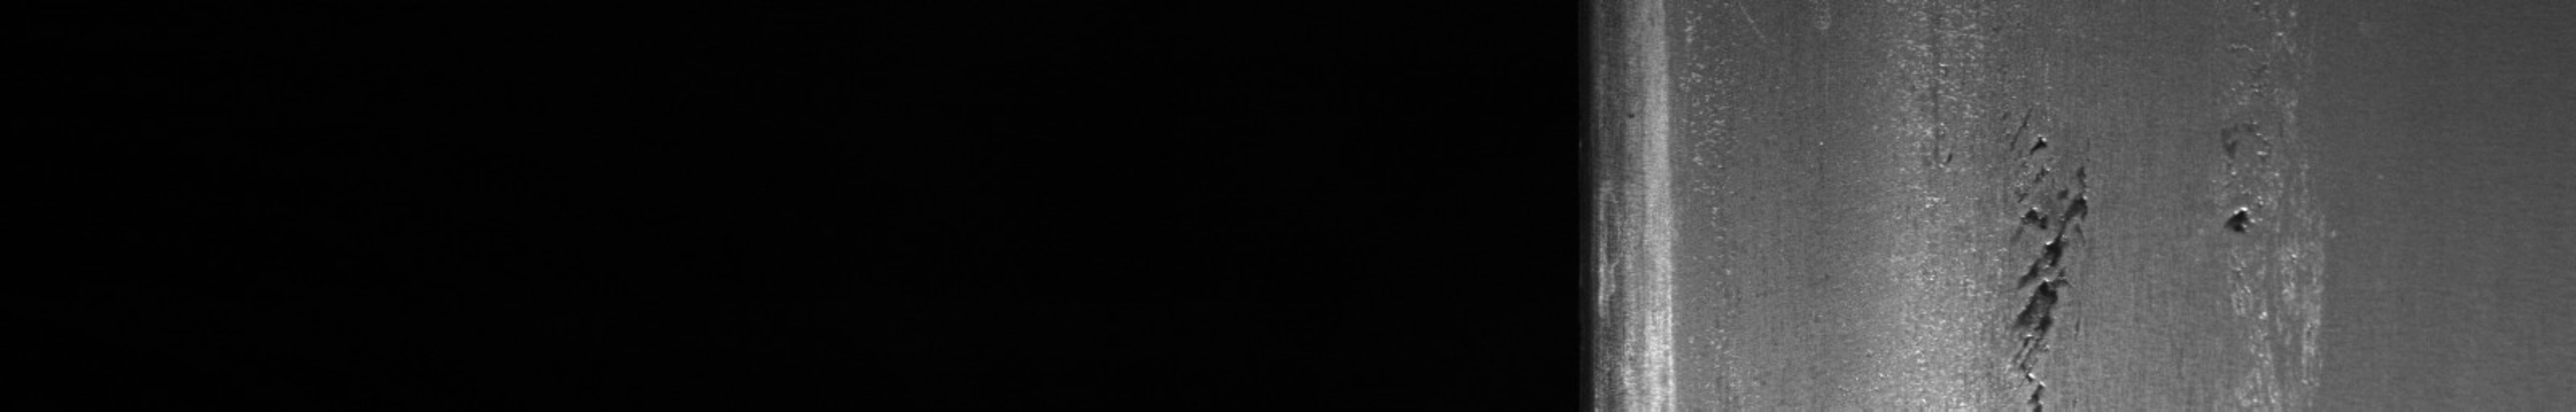

In [ ]:
cv2_imshow( zoomed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Vertical flip


Original Image:


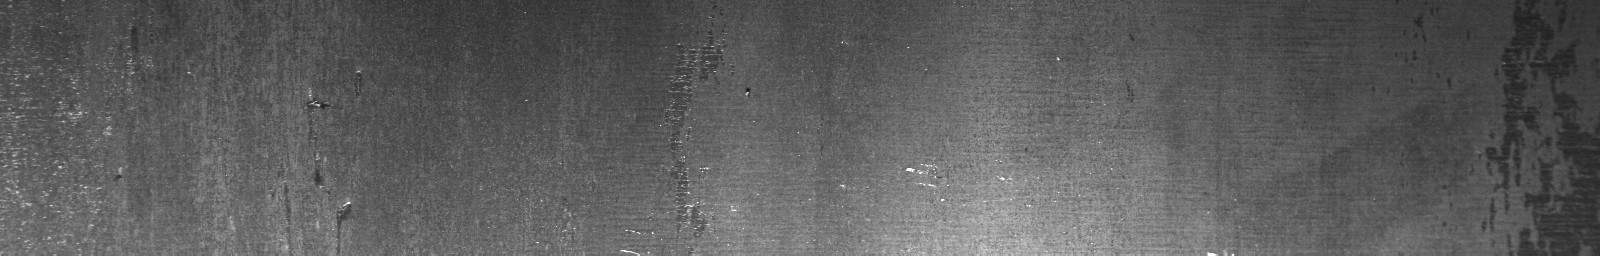


Vertically Flipped Image:


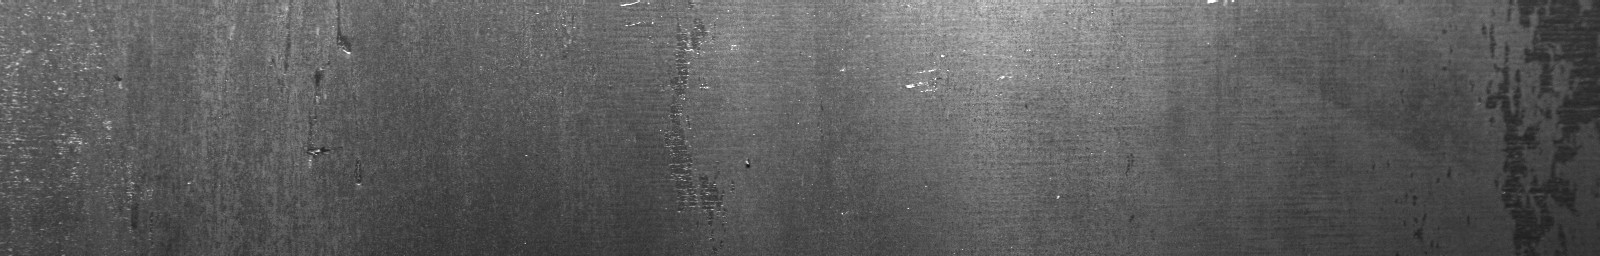


Flipped image saved as 'flipped_image_vertical.jpg'.


In [ ]:


# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Function to flip an image vertically
def flip_image_vertically(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load image.")
        return

    # Flip the image vertically
    flipped_image = cv2.flip(image, 0)

    # Display the original and flipped images
    print("Original Image:")
    cv2_imshow(image)
    print("\nVertically Flipped Image:")
    cv2_imshow(flipped_image)

    # Save the flipped image
    cv2.imwrite("flipped_image_vertical.jpg", flipped_image)
    print("\nFlipped image saved as 'flipped_image_vertical.jpg'.")

# Path to the image in your Google Drive
image_path = "/content/drive/MyDrive/severstal/project/train_images/0002cc93b.jpg"

# Call the function to flip the image vertically
flip_image_vertically(image_path)








# Horizontal flip

Original Image:


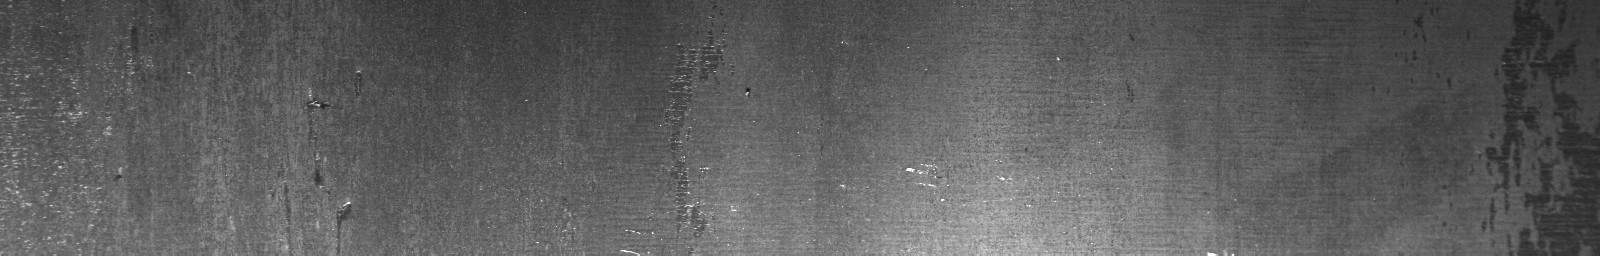


Flipped Image:



Flipped image saved as 'flipped_image.jpg'.


In [ ]:


# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Function to flip an image horizontally
def flip_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load image.")
        return

    # Flip the image horizontally
    flipped_image = cv2.flip(image, 1)

    # Display the original and flipped images
    print("Original Image:")
    cv2_imshow(image)
    print("\nFlipped Image:")
    cv2_imshow(flipped_image)

    # Save the flipped image
    cv2.imwrite("flipped_image.jpg", flipped_image)
    print("\nFlipped image saved as 'flipped_image.jpg'.")

# Path to the image in your Google Drive
image_path = "/content/drive/MyDrive/severstal/project/train_images/0002cc93b.jpg"

# Call the function to flip the image
flip_image(image_path)


# Rotate an image

Original Image:


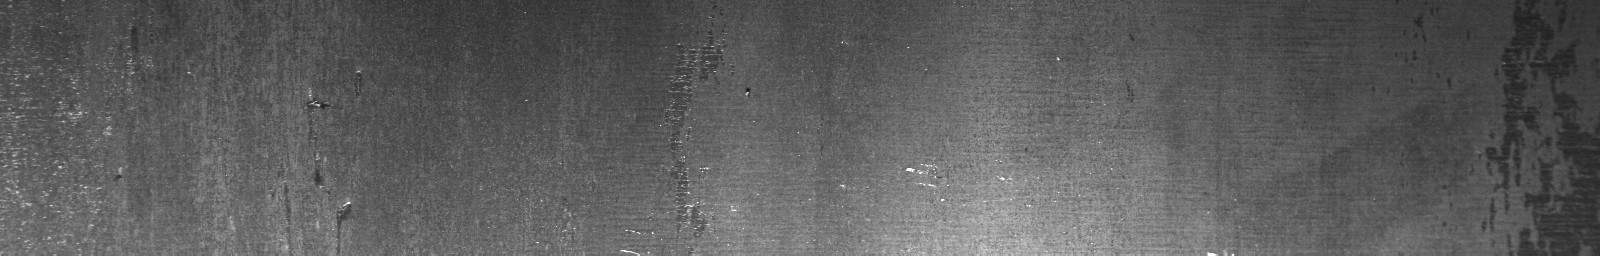


Rotated Image:



Rotated image saved as 'rotated_image.jpg'.


In [ ]:


# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to rotate an image
def rotate_image(image_path, angle):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load image.")
        return

    # Get image height, width, and number of channels
    height, width = image.shape[:2]

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Apply the rotation matrix to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Display the original and rotated images
    print("Original Image:")
    cv2_imshow(image)
    print("\nRotated Image:")
    cv2_imshow(rotated_image)

    # Save the rotated image
    cv2.imwrite("rotated_image.jpg", rotated_image)
    print("\nRotated image saved as 'rotated_image.jpg'.")

# Path to the image in your Google Drive
image_path = "/content/drive/MyDrive/severstal/project/train_images/0002cc93b.jpg"

# Specify the angle of rotation (in degrees)
angle = 45

# Call the function to rotate the image
rotate_image(image_path, angle)


## width shift range

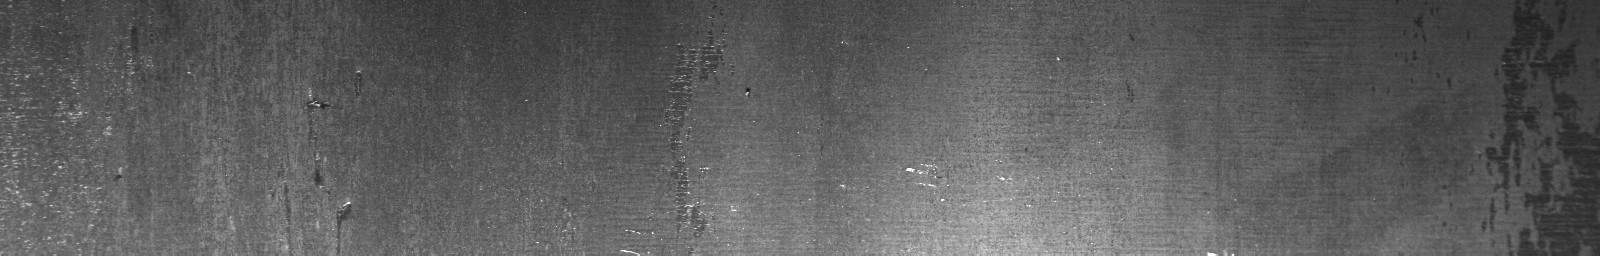

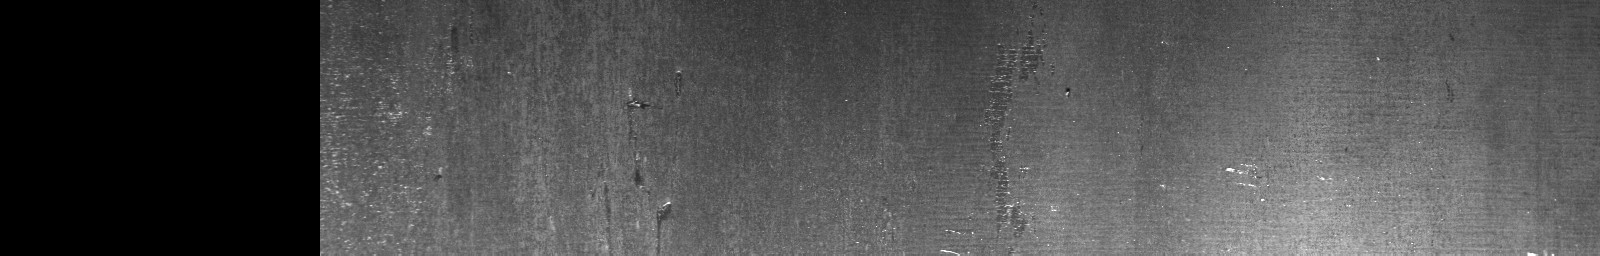

In [4]:
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow

def width_shift(image, shift_range):
    # Convert image to numpy array
    image_array = np.array(image)

    # Calculate shift amount
    width_shift_amount = int(image_array.shape[1] * shift_range)

    # Shift the image horizontally
    if width_shift_amount > 0:
        shifted_image = np.pad(image_array, ((0, 0), (width_shift_amount, 0), (0, 0)), mode='constant')[:, :-width_shift_amount, :]
    elif width_shift_amount < 0:
        shifted_image = np.pad(image_array, ((0, 0), (0, -width_shift_amount), (0, 0)), mode='constant')[:, -width_shift_amount:, :]
    else:
        shifted_image = image_array

    return shifted_image

# Load the image using OpenCV
image_path = '/content/drive/MyDrive/archive/train_images/0002cc93b.jpg'
image = cv2.imread(image_path)

# Define the width shift range (as a fraction of the total width)
shift_range = 0.2  # Example: 20% of the total width

# Perform width shift
shifted_image = width_shift(image, shift_range)

# Display the original and shifted images
cv2_imshow(image)
cv2_imshow(shifted_image)


# Height shift range

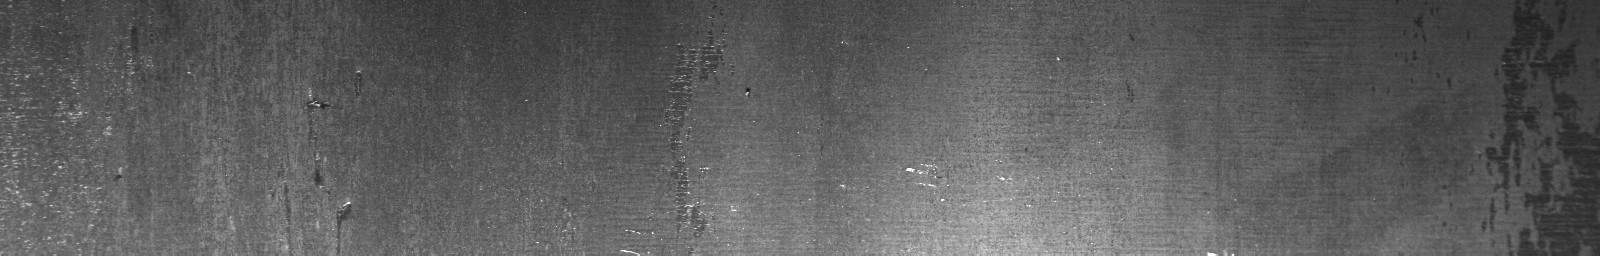

In [5]:
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow

def height_shift(image, shift_range):
    # Convert image to numpy array
    image_array = np.array(image)

    # Calculate shift amount
    height_shift_amount = int(image_array.shape[0] * shift_range)

    # Shift the image vertically
    if height_shift_amount > 0:
        shifted_image = np.pad(image_array, ((height_shift_amount, 0), (0, 0), (0, 0)), mode='constant')[:-height_shift_amount, :, :]
    elif height_shift_amount < 0:
        shifted_image = np.pad(image_array, ((0, -height_shift_amount), (0, 0), (0, 0)), mode='constant')[-height_shift_amount:, :, :]
    else:
        shifted_image = image_array

    return shifted_image

# Load the image using OpenCV
image_path = '/content/drive/MyDrive/archive/train_images/0002cc93b.jpg'
image = cv2.imread(image_path)

# Define the height shift range (as a fraction of the total height)
shift_range = 0.2  # Example: 20% of the total height

# Perform height shift
shifted_image = height_shift(image, shift_range)

# Display the original and shifted images
cv2_imshow(image)
cv2_imshow(shifted_image)


# fill mode(nearest)

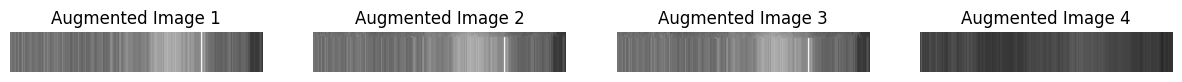

In [6]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/archive/train_images/0002cc93b.jpg'
image = load_img(image_path)

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to a numpy array
image_array = img_to_array(image)
image_array = image_array.reshape((1,) + image_array.shape)

# Initialize the ImageDataGenerator for width shift with nearest fill mode
datagen = ImageDataGenerator(width_shift_range=0.2, fill_mode='nearest')

# Generate augmented images
aug_iter = datagen.flow(image_array, batch_size=1)

# Generate and display augmented images
num_augmented_images = 4
plt.figure(figsize=(15, 5))
for i in range(num_augmented_images):
    augmented_image = aug_iter.next()[0].astype('uint8')
    plt.subplot(1, num_augmented_images, i + 1)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.show()
